<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/TransactionsFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("/content/transactions.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,8,CASH_OUT,158007.12,C424875646,0.00,0.00,C1298177219,474016.32,1618631.97,0
1,236,CASH_OUT,457948.30,C1342616552,0.00,0.00,C1323169990,2720411.37,3178359.67,0
2,37,CASH_IN,153602.99,C900876541,11160428.67,11314031.67,C608741097,3274930.56,3121327.56,0
3,331,CASH_OUT,49555.14,C177696810,10865.00,0.00,C462716348,0.00,49555.14,0
4,250,CASH_OUT,29648.02,C788941490,0.00,0.00,C1971700992,56933.09,86581.10,0


In [4]:
df=df.drop(["nameDest","nameOrig"],axis=1)

In [5]:
df.isnull().sum()

,0
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [7]:
df[df["isFraud"]==1].value_counts()

step  type      amount      oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  isFraud
741   CASH_OUT  323726.61   323726.61      0.0             561753.58       885480.19       1          1
2     CASH_OUT  1096187.24  1096187.24     0.0             0.00            1096187.24      1          1
7     CASH_OUT  5460002.91  5460002.91     0.0             0.00            9281535.44      1          1
8     TRANSFER  43092.00    43092.00       0.0             0.00            0.00            1          1
13    TRANSFER  6188514.81  6188514.81     0.0             0.00            0.00            1          1
                                                                                                     ..
59    CASH_OUT  394388.09   394388.09      0.0             1260564.49      1654952.58      1          1
58    TRANSFER  561948.38   561948.38      0.0             0.00            0.00            1          1
      CASH_OUT  6501303.14  6501303.14     0.0             4439499.50      10940802.64     1          1
                3156421.43  3156421.43     0.0             181440.45       3337861.88      1          1
55    TRANSFER  760625.76   760625.76      0.0             0.00            0.00            1          1
Name: count, Length: 282, dtype: int64

In [11]:
count_type = df[df["isFraud"] == 1].groupby("type").count()

In [12]:
count_type

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
type,,,,,,,
CASH_OUT,132,132,132,132,132,132,132
TRANSFER,150,150,150,150,150,150,150


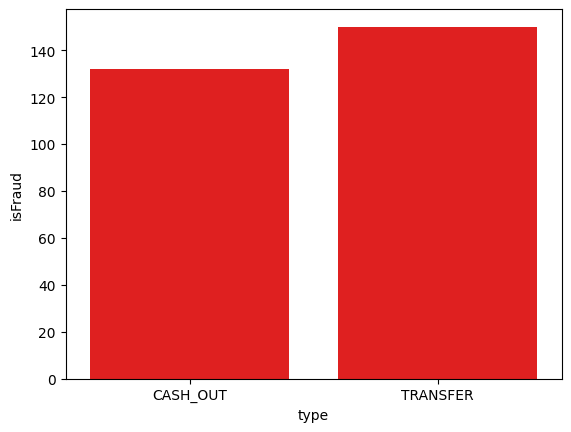

In [13]:
sns.barplot(x=count_type.index, y=count_type["isFraud"], color="red")
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
le= LabelEncoder()
df["type"]=le.fit_transform(df["type"])

In [17]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss = StandardScaler()
numerical_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df[numerical_cols] = ss.fit_transform(df[numerical_cols])

In [21]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,-1.659306,1,-0.035545,-0.288462,-0.292161,-0.187603,0.110208,0
1,-0.051409,1,0.443941,-0.288462,-0.292161,0.492531,0.540219,0
2,-1.454793,0,-0.042586,3.583585,3.586034,0.660422,0.524496,0
3,0.618548,1,-0.208917,-0.284692,-0.292161,-0.331119,-0.322380,0
4,0.047321,1,-0.240741,-0.288462,-0.292161,-0.313882,-0.312172,0


In [22]:
X= df.drop("isFraud", axis=1)
y=df["isFraud"]

In [24]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_test)

In [27]:
ac_r= accuracy_score(y_test, y_pred_rf)
ac_r

0.9995

In [28]:
from sklearn.metrics import roc_auc_score

In [29]:
rac= roc_auc_score(y_test, y_pred_rf)

In [30]:
rac

np.float64(0.8240615571762621)

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [34]:
fpr, tpr, threshold= roc_curve(y_test, y_pred_rf)

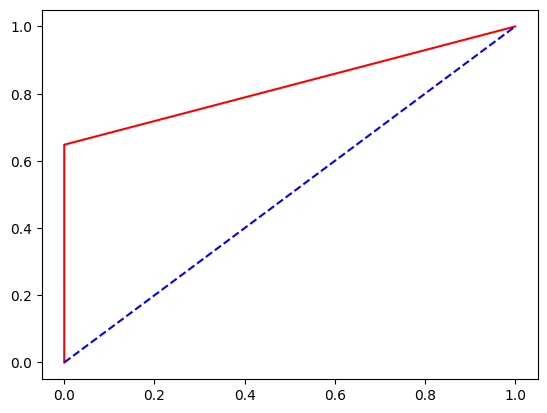

In [39]:
sns.scatterplot(x=fpr, y=tpr,color="red")
sns.lineplot([0,1],[0,1])
plt.show()

In [43]:
from skleanr.imbalance import SMOTE

In [45]:
smote= SMOTE()
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)

In [46]:
rf_smote=RandomForestClassifier()
rf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote=rf_smote.predict(X_test)

In [47]:
as_smote= accuracy_score(y_test, y_pred_smote)
as_smote

0.998575

In [48]:
tpr_smote= roc_auc_score(y_test, y_pred_smote)
tpr_smote

np.float64(0.9068191132102412)

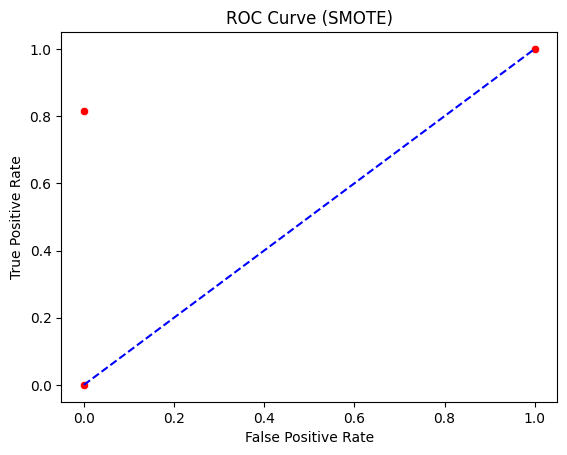

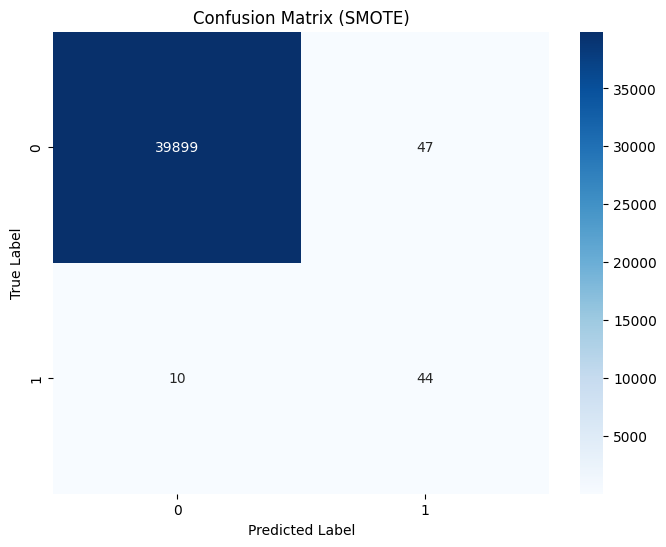

Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39946
           1       0.48      0.81      0.61        54

    accuracy                           1.00     40000
   macro avg       0.74      0.91      0.80     40000
weighted avg       1.00      1.00      1.00     40000



In [50]:
import matplotlib.pyplot as plt
# ROC Curve for SMOTE model
fpr_smote, tpr_smote_curve, threshold_smote= roc_curve(y_test, y_pred_smote)
sns.scatterplot(x=fpr_smote, y=tpr_smote_curve,color="red")
plt.plot([0,1],[0,1], color='blue', linestyle='--') # Fixed line for the diagonal
plt.title('ROC Curve (SMOTE)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Confusion matrix for SMOTE model
cm_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_smote, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix (SMOTE)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report for SMOTE model
print("Classification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote))